In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Gradient descent, Logistic Regression and Introduction to Neural Networks

Today's task is to do implement the gradient descent algorithm on a simple case and visalize what it does. Then, we will implement logistic regression to classify images of even/odd digits of the MNIST dataset.
1. In Exercise 1, we will implement the gradient descent algorithm in a 1D case and visualize its behavior.
2. In Exercise 2, we will load and preprocess the MNIST and its labels.
3. In Exercise 3, we will perform classification by doing logistic regression.
4. In Exercise 4, we will obtain some familiarity with Neural Networks using a web playground.

## Exercice 1: Gradient descent for a single variable function

In this exercise, we apply the gradient descend algorithm to find the minimum $\hat{x}$ of the function $f(x)=x^2$, $x\in\mathbb{R}$.

**1.1** Code the function $f(x)$ that takes as an input a scalar or a numpy array and returns its (element-wise) square. Your code should not include a loop.

In [ ]:
# Your code here:

**1.2** To test your implementation, plot the function $f(x)$ between $-5$ and $5$.

In [ ]:
# Your code here:

**1.3** Let us now compute the gradient. Since $x$ is a scalar, the gradient is simply the derivative. Code a function that takes as an input a scalar or a numpy array and returns the derivative $f'(x)$ element wise at the given input values:

In [ ]:
# Your code here:

**1.4** Implement the gradient descent algorithm to find the minimum $\hat{x}$ of f. Set the learning rate $\gamma=0.1$ and initialize $x=2$. Do $T=100$ iterations of the gradient descent algorithm (do not use a stopping/convergence condition). Print your obtained $\hat{x}$. Check that your obtained result is close to the minimum of $f(x)= x^2$. Recall that one step of the gradient descent algorithm is
$$
x_{t+1}=x_t-\gamma \nabla f(x_t)
$$
and use your function from 1.3 to compute the gradient.

In [ ]:
# Your code here:

Your answer here:

**1.5** We will now study the influence of the learning rate $\gamma$. Apply the gradient descent algorithm for $T=7$ steps, $\gamma=0.1$ and intialize $x=2$, and store the initial value of $x$ as well as the value of $x$ after each gradient descent step in a numpy array. Print the obtained array.

In [ ]:
# Your code here:

**1.6** Code a function that takes as an input a list of values of $x_i$ and that plots $f(x)$ in blue between $-3$ and $3$ and scatters the points $(x_i, f(x_i))$ in red on the same plot. The function should have an additional input which is a string that is used as the title of the figure. Call this function with the previously obtained list and a title indicated the used $\gamma$. Describe and explain qualitatively what you obtain. Be concise (maximum 4-5 sentences). 

In [ ]:
# Your code here:

Your answer here.

**1.7** Repeat 1.5 and 1.6 now with $T=5$ steps for $\gamma=0.25, 0.5, 0.8 \text{ and } 1.05$. Reuse your function from 1.6 to draw the figures (change the title to the appropriate learning rate). You can copy-past your code if needed, but in this case use a new cell for each learning rate.

In [ ]:
# Your code here:

**1.8** Answer briefly the following questions using your obtained figures:
- Compare $\gamma=0.1$ and $\gamma=0.25$. What changes ?
- Describe what happens for $\gamma=0.8$.
- Describe what happens for $\gamma=1.05$. What is the problem ?
- What happens for $\gamma=0.5$ ? Explain why this happens. Is this dependent on the initial $x$ in our case ?

Your answer here:

## Ex 2. Dataset loading and preprocessing
We first preprocess the mnist dataset.
Our task is to do even/odd binary classification on the MNIST dataset. 
The dataset is composed of 10000 images, each of which is 28x28 pixels. 

In [2]:
#load the mnist dataset
mnist= np.load("mnist.npy")
mnist_labels = np.load("mnist_labels.npy")

X=mnist
y=(mnist_labels%2)*2.0-1 # 1 for odd, -1 for even.

label=1.0


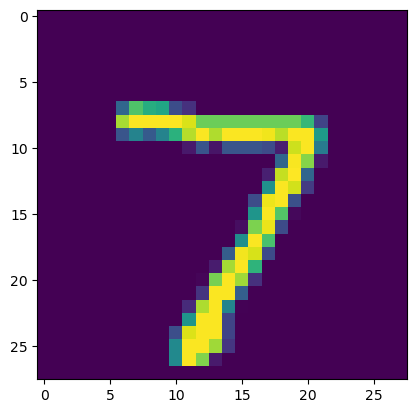

In [3]:
#printing the first digit
idx=0
plt.imshow(X[idx])
print(f"label={y[idx]}")

#### Ex 2.1
1. Reshape X so that it is a 10000 by 768 matrix.
2. Do a 60:20:20  train, validation, test split. The train, validation and test set shall be named `X_train`,`y_train`, `X_val`, `y_val`, `X_test`,  `y_test`

Before splitting, the lines of the data matrix should be randomly permuted to guarantee that samples in each set are independent.

Hint: for the splitting, check for a dedicated function in skelarn

In [4]:
### your code goes here ###

#### Ex 2.2 Normalize the dataset. 
1. Compute the mean and standard deviation (std) over the whole *training* dataset (i.e. the mean and std should be two scalars computed on all the elements of `X_train`). 
2. Then, normalize the `X_train`,`X_val`,`X_test` using the mean and std computed above.

Why do we use `X_train` to compute the normalization and then applying the same normalization also to `X_val`,  `X_test`? For two reasons:
1. If one computed the normalization on the whole `X`, this would have introduced correlations between the datasets
2. In some cases `X_test,y_test` represent new data which are not available at the moment of training. Then it's important to have a unique way of normalizing, using only the training set

An additional note on normalization: two weaks ago, we normalized the images by taking the mean and standard deviation for each pixel, last week we normalized the images by putting them in the range $0-1$, and this week we normalize them by taking the mean and standard deviation over all the pixels. As you can see, there is not a unique way of normalizing the data. Each method has its specific application and advantages. For instance, a normalization between $0-1$ may be more adapted when the distribution is not gaussian or when the standard deviation is very small, it is however sensitive to outliers.

In [6]:
### your code goes here ###

## Ex 3: Logistic regression
In this exercise you will implement a classifier that uses logistic regression to distinguish even from odd digits in the MNIST dataset. The classifier will be trained using gradient descent.
Let's set some notation: we call $n$ the number of datapoints in the training set and $d$ the dimensionality (in our case the number of pixels) of each datapoint.

In the logistic regression case, recall that our predictor is $z= \vec x \cdot \vec w$, where both $\vec x$ and $\vec w$ are in $\mathbb R^d$.

The regularized training loss is
$$\mathcal L(\vec w)=\frac{1}{n}\sum_{\mu=1}^n\ell(y_\mu,\vec X_\mu\cdot \vec w)+\frac{\lambda}{n}\sum_{i=1}^d w_i^2,\quad \ell(y,z)=\log(1+e^{-yz})$$

The gradient of the loss with respect to $\vec w $ is 
$$\frac{\partial \mathcal L}{\partial \vec w_i}(\vec w)=-\frac{1}{n}\sum_{\mu=1}^n \frac{e^{-y_\mu \vec X_\mu\cdot \vec w}}{1+e^{-y_\mu \vec X_\mu\cdot \vec w}} X_{\mu i} y_\mu+\frac{2\lambda}{n}\vec w_i$$

#### Ex 3.1:  Implementing the gradient
Using the above formula, implement a function `loss_gradient` that takes as arguments `X_train,y_train,w,lambd` and returns a numpy array containing the gradient of the loss.

In [ ]:
### your code goes here ###

#### Ex 3.2: training
Write a training loop that perfoms gradient descent.
1. Set $\lambda=1$ and choose a good step size that allows the algorithm to learn. 2000 steps should be enough to learn. For the initialization you can use a random one.
2. Every 100 gradient steps, a measurement of training and validation accuracies (i.e. 1- error), should be taken and stored in lists. 
3. After the training make a plot of train and test accuracies vs time

*Recall that the accuracy of a model is the fraction of times the model correctly predicts the class.*

In [9]:
tmax=2000 #number of iterations
lambd=1 #regularization

### your code goes here ###

for t in range(tmax):# training loop
    ### your code goes here ###
    pass 

#### Ex 3.3: Early stopping
Modify the training loop to implement early stopping (you can copy-paste the training loop you wrote and modify it). 
You will do so by still runnnig gradient descent for a fixed number of steps `tmax`.
Whenever you take a measurement of the validation accuracy, check if this is the highest accuracy reached so far in the training. If it is, save in memory the current weight vector and time. This way at the end of training you will have your weight vector with highest validation accuracy.

After training the model again make a showing the train and validation accuracies vs time. Mark in some way the time at which the highest validation accuracy was achieved. Finally compute the test error of the weight vector with highest validation error


###  Ex 3.4: Logistic regression with sklearn
The scikit-learn library contains a logistic regression implementation, allowing to train logistic regression in a couple of lines of code. 
1. Implement logistic regression without regularization
2. Compute the test error


In [15]:
from sklearn.linear_model import LogisticRegression
### your code goes here ###

## Ex 4: Visualization of Neural Networks
To obtain some familiarity with neural networks, go to https://playground.tensorflow.org/.
On the left you can choose a dataset on which to do classification. You can then modify the network by choosing the number of hidden layers, number of neurons in each layer, activation function. 

The hardest dataset to learn is the spiral: play with the parameters of the network until it manages to learn this dataset.